<a href="https://colab.research.google.com/github/marilikalantzi/datajour/blob/main/Nb1_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [55]:
import pandas as pd

In [56]:
df = pd.read_excel('/content/gdrive/MyDrive/Τελική εργασία σεμινάριο/report.xlsx')
df.tail(1)

,type,source,title,text,categories,sentiment,impact,date,time,link
4999,web,xiakoslaos.gr,Δημοσκόπηση Pulse: Διατηρεί τη μεγάλη διαφορά ...,Την τελευταία δημοσκόπηση πριν το άνοιγμα των ...,ΕΥΡΩΕΚΛΟΓΕΣ - ΕΥΡΩΒΟΥΛΗ,Neutral,49.6288,2024-06-07,22:38:58,https://www.xiakoslaos.gr/poltiki/326490/dimos...


In [57]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [58]:
df['full_text'] = df[['title', 'text']].agg(' '.join, axis=1)

In [59]:
df.tail(1)

,type,source,title,text,categories,sentiment,impact,date,time,link,full_text
4877,web,xiakoslaos.gr,Δημοσκόπηση Pulse: Διατηρεί τη μεγάλη διαφορά ...,Την τελευταία δημοσκόπηση πριν το άνοιγμα των ...,ΕΥΡΩΕΚΛΟΓΕΣ - ΕΥΡΩΒΟΥΛΗ,Neutral,49.6288,2024-06-07,22:38:58,https://www.xiakoslaos.gr/poltiki/326490/dimos...,Δημοσκόπηση Pulse: Διατηρεί τη μεγάλη διαφορά ...


In [60]:
df['datetime'] = df[['date', 'time']].agg(' '.join, axis=1)

In [61]:
selected_cols_df = df[["source", "categories", "datetime", "full_text"]]
selected_cols_df.head(1)

,source,categories,datetime,full_text
0,tinealarissa.gr,ΕΥΡΩΕΚΛΟΓΕΣ - ΕΥΡΩΒΟΥΛΗ,2024-06-08 23:59:52,"Καλοκαίρι, παραλία και… Ευρωεκλογές! Ο δήμαρχο..."


In [62]:
short_df = selected_cols_df[['datetime' ,'full_text']]
short_df.head(1)

,datetime,full_text
0,2024-06-08 23:59:52,"Καλοκαίρι, παραλία και… Ευρωεκλογές! Ο δήμαρχο..."


In [63]:
short_df['year'] = pd.DatetimeIndex(short_df['datetime']).year
short_df['month'] = pd.DatetimeIndex(short_df['datetime']).month
short_df['day'] = pd.DatetimeIndex(short_df['datetime']).day
short_df['hour'] = pd.DatetimeIndex(short_df['datetime']).hour

<ipython-input-63-d89a16ac556a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['year'] = pd.DatetimeIndex(short_df['datetime']).year


In [64]:
short_df.head(1)

,datetime,full_text,year,month,day,hour
0,2024-06-08 23:59:52,"Καλοκαίρι, παραλία και… Ευρωεκλογές! Ο δήμαρχο...",2024,6,8,23


<Axes: xlabel='hour'>

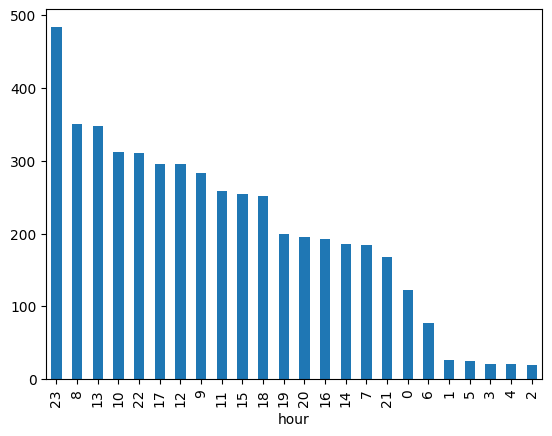

In [65]:
short_df['hour'].value_counts().plot(kind='bar')

<Axes: xlabel='day'>

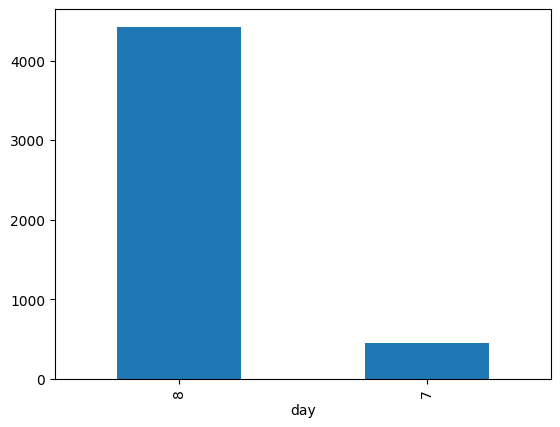

In [66]:
short_df['day'].value_counts().plot(kind='bar')

In [67]:
selected_cols_df.to_csv("/content/gdrive/MyDrive/Τελική εργασία σεμινάριο/report.csv", index=False)
selected_cols_df.tail(1)

,source,categories,datetime,full_text
4877,xiakoslaos.gr,ΕΥΡΩΕΚΛΟΓΕΣ - ΕΥΡΩΒΟΥΛΗ,2024-06-07 22:38:58,Δημοσκόπηση Pulse: Διατηρεί τη μεγάλη διαφορά ...


In [68]:
df.head(1)

,type,source,title,text,categories,sentiment,impact,date,time,link,full_text,datetime
0,web,tinealarissa.gr,"Καλοκαίρι, παραλία και… Ευρωεκλογές! Ο δήμαρχο...",Summer TV Χώστες Show λίγο μετά τα μεσάνυχτα τ...,ΕΥΡΩΕΚΛΟΓΕΣ - ΕΥΡΩΒΟΥΛΗ,Positive,90.78,2024-06-08,23:59:52,https://tinealarissa.gr/2024/06/08/%ce%ba%ce%b...,"Καλοκαίρι, παραλία και… Ευρωεκλογές! Ο δήμαρχο...",2024-06-08 23:59:52


In [69]:
df['date'] = df[['date', 'time']].agg(' '.join, axis=1)

In [71]:
short_df2 = df[['source', 'categories', 'date' , 'full_text']]
short_df2.head(1)

,source,categories,date,full_text
0,tinealarissa.gr,ΕΥΡΩΕΚΛΟΓΕΣ - ΕΥΡΩΒΟΥΛΗ,2024-06-08 23:59:52,"Καλοκαίρι, παραλία και… Ευρωεκλογές! Ο δήμαρχο..."


In [72]:
short_df2.to_csv("/content/gdrive/MyDrive/Τελική εργασία σεμινάριο/report2.csv", index=False)